In [33]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2.1-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 2.1.1
Scikit-Learn 1.2.2
GPU is available


In [34]:
# IMPORTING STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import mutual_information_regression as mri
#import helper_functions_fs as hf

np.random.seed(7)

In [35]:
from sklearn.preprocessing import StandardScaler

# Import the Data

In [36]:
# training data
data = pd.read_csv('../0_data/train.csv', index_col=0).reset_index(drop=True)
data.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  \
0         3.750          5.631                    96500           4693   
1         4.375          5.745                    93258           3194   
2         2.750         21.300                    82260           6344   
3         3.375          4.000                    71172           9776   
4         4.250          8.000                    65755           3800   

   HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...  \
0         69400  72.0           360    65    61           21.76  ...   
1         94200  79.0           360    34     0           30.74  ...   
2         81700  99.0           360    32    56           27.87  ...   
3         76700  80.0           360    25    25            9.00  ...   
4         73100  80.0           360    30     0           12.00  ...   

   State_31  State_39  State_42  State_48  State_55  State_infrequent_sklearn  \
0       0.0       0.0       0.0       0.0       1.0                       0.0   
1       0.0       0.0       0.0       0.0       1.0                       0.0   
2       0.0       0.0       0.0       0.0       0.0                       0.0   
3       0.0       1.0       0.0       0.0       0.0                       0.0   
4       0.0       1.0       0.0       0.0       0.0                       0.0   

   Minority_Min  Minority_Missing  Minority_White  Borrower2Dummy  
0           0.0               0.0             1.0               1  
1           0.0               0.0             1.0               0  
2           0.0               0.0             1.0               1  
3           0.0               0.0             1.0               1  
4           0.0               0.0             1.0               0  

[5 rows x 74 columns]

In [37]:
data.columns

Index(['InterestRate', 'MinorityRatio', 'CensusTractMedFamIncome',
       'MonthlyIncome', 'HUDMedIncome', 'LTV', 'PaymentCount', 'Age1', 'Age2',
       'HousingExpense', 'DebtExpense', 'PMI', 'CreditScore1', 'CreditScore2',
       'NoteDate', 'NoteAmount', 'BorrowerCount', 'FirstTime', 'SelfEmployed',
       'Bank_Boston', 'Bank_Chicago', 'Bank_Cincinnati', 'Bank_Dallas',
       'Bank_Des Moines', 'Bank_Indianapolis', 'Bank_Pittsburgh',
       'Bank_Topeka', 'Bank_infrequent_sklearn', 'LoanPurpose_1',
       'LoanPurpose_2', 'LoanPurpose_6', 'MortgageType_0',
       'MortgageType_infrequent_sklearn', 'Gender1_1', 'Gender1_2',
       'Gender1_3', 'Gender2_1', 'Gender2_2', 'Gender2_3', 'Gender2_4',
       'PropertyType_1', 'PropertyType_6', 'PropertyType_7',
       'PropertyType_infrequent_sklearn', 'Race1_2', 'Race1_5', 'Race1_6',
       'Race1_infrequent_sklearn', 'Minority2_Min', 'Minority2_Missing',
       'Minority2_White', 'Race2_5', 'Race2_6', 'Race2_8',
       'Race2_infrequent_

In [38]:
data.drop(['Borrower2Dummy', 'Bank_infrequent_sklearn', 'LoanPurpose_6','MortgageType_infrequent_sklearn', 
           'Gender1_2', 'Gender2_2', 'PropertyType_infrequent_sklearn', 'Race1_infrequent_sklearn', 'Minority2_White', 
           'Race2_infrequent_sklearn','State_infrequent_sklearn', 'Minority_White'
          ], axis=1, inplace=True)

In [39]:
# defining response variable and input features
y = data.pop('InterestRate')
X = data.copy()

In [40]:
# test data
data_test = pd.read_csv('../0_data/test.csv', index_col=0).reset_index(drop=True)
data_test.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  \
0         4.000         47.950                    80357          18334   
1         3.250          6.489                   112882          10065   
2         3.475          9.661                   118045          19272   
3         3.125          5.172                   100096           5171   
4         4.750          4.396                    91638          14262   

   HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...  \
0         95900  80.0           360    39     0           17.07  ...   
1         86200  72.0           360    64    66           20.14  ...   
2         82300  72.0           360    62    62           14.70  ...   
3         89200  80.0           180    43     0           25.31  ...   
4         79600  80.0           360    39    31           12.66  ...   

   State_31  State_39  State_42  State_48  State_55  State_infrequent_sklearn  \
0       0.0       0.0       0.0       1.0       0.0                       0.0   
1       0.0       0.0       0.0       0.0       0.0                       1.0   
2       0.0       0.0       0.0       0.0       1.0                       0.0   
3       0.0       0.0       0.0       0.0       0.0                       0.0   
4       0.0       0.0       0.0       0.0       0.0                       0.0   

   Minority_Min  Minority_Missing  Minority_White  Borrower2Dummy  
0           0.0               0.0             1.0               0  
1           0.0               0.0             1.0               1  
2           0.0               1.0             0.0               1  
3           0.0               0.0             1.0               0  
4           0.0               0.0             1.0               1  

[5 rows x 74 columns]

In [41]:
data_test.drop(['Borrower2Dummy', 'Bank_infrequent_sklearn', 'MortgageType_infrequent_sklearn', 'Gender1_2',
           'Gender2_2', 'PropertyType_infrequent_sklearn', 'Race1_infrequent_sklearn', 'Minority2_White', 
           'Race2_infrequent_sklearn','State_infrequent_sklearn', 'Minority_White', 'LoanPurpose_6'
          ], axis=1, inplace=True)

In [42]:
y_test = data_test.pop('InterestRate')
X_test = data_test.copy()

# Scaling: Standardization
It helps in cases where the features have different units or scales, and you want to ensure that no single feature dominates the learning process.

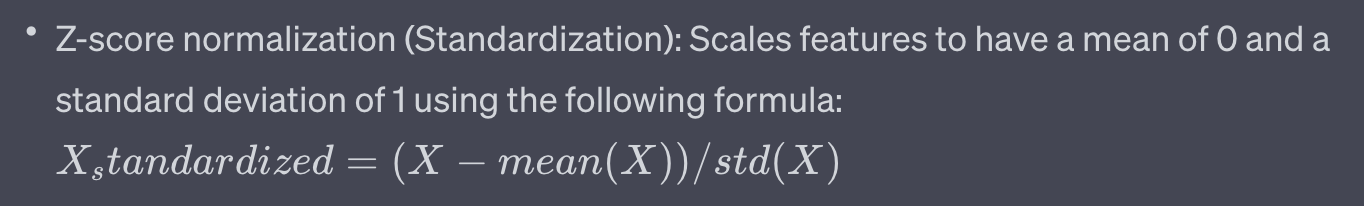


Standardization:
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.





### ONLY NUMERICAL VARS




In [43]:
numerical = pd.read_csv('../0_data/numerical.csv', index_col=0)
numerical

0
0              InterestRate
1             MinorityRatio
2   CensusTractMedFamIncome
3             MonthlyIncome
4              HUDMedIncome
5                       LTV
6              PaymentCount
7                      Age1
8                      Age2
9            HousingExpense
10              DebtExpense
11                      PMI
12             CreditScore1
13             CreditScore2
14                 NoteDate
15               NoteAmount

In [44]:
# separate numerical and dummies

X_num = pd.concat([X.pop(col) for col in list(numerical.iloc[1:,0])], axis=1)
X['BorrowerCount'] = X['BorrowerCount']-1

X_test_num = pd.concat([X_test.pop(col) for col in list(numerical.iloc[1:,0])], axis=1)
X_test['BorrowerCount'] = X_test['BorrowerCount']-1

In [45]:
X_num.head()

MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  HUDMedIncome   LTV  \
0          5.631                    96500           4693         69400  72.0   
1          5.745                    93258           3194         94200  79.0   
2         21.300                    82260           6344         81700  99.0   
3          4.000                    71172           9776         76700  80.0   
4          8.000                    65755           3800         73100  80.0   

   PaymentCount  Age1  Age2  HousingExpense  DebtExpense  PMI  CreditScore1  \
0           360    65    61           21.76        41.21  0.0             2   
1           360    34     0           30.74        42.45  0.0             5   
2           360    32    56           27.87        34.72  0.0             3   
3           360    25    25            9.00        10.00  0.0             5   
4           360    30     0           12.00        23.00  0.0             4   

   CreditScore2  NoteDate  NoteAmount  
0             2      2019      146000  
1             9      2019      129000  
2             4      2020      311258  
3             5      2020      130000  
4             9      2019       72000

In [46]:
X.head()

BorrowerCount  FirstTime  SelfEmployed  Bank_Boston  Bank_Chicago  \
0              1          0             0          0.0           1.0   
1              0          1             1          0.0           1.0   
2              1          1             0          0.0           0.0   
3              1          1             0          0.0           0.0   
4              0          0             1          0.0           0.0   

   Bank_Cincinnati  Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
0              0.0          0.0              0.0                0.0   
1              0.0          0.0              0.0                0.0   
2              0.0          0.0              0.0                0.0   
3              1.0          0.0              0.0                0.0   
4              1.0          0.0              0.0                0.0   

   Bank_Pittsburgh  ...  State_26  State_27  State_29  State_31  State_39  \
0              0.0  ...       0.0       0.0       0.0       0.0       0.0   
1              0.0  ...       0.0       0.0       0.0       0.0       0.0   
2              0.0  ...       0.0       0.0       0.0       0.0       0.0   
3              0.0  ...       0.0       0.0       0.0       0.0       1.0   
4              0.0  ...       0.0       0.0       0.0       0.0       1.0   

   State_42  State_48  State_55  Minority_Min  Minority_Missing  
0       0.0       0.0       1.0           0.0               0.0  
1       0.0       0.0       1.0           0.0               0.0  
2       0.0       0.0       0.0           0.0               0.0  
3       0.0       0.0       0.0           0.0               0.0  
4       0.0       0.0       0.0           0.0               0.0  

[5 rows x 46 columns]

In [47]:
# scale numerical vars 
ss = StandardScaler()
X_train_num = ss.fit_transform(X_num)
X_test_num = ss.transform(X_test_num)
X_num = pd.DataFrame(X_train_num, columns=list(numerical.iloc[1:,0]))
X_test_num = pd.DataFrame(X_test_num, columns=list(numerical.iloc[1:,0]))
X_num.describe()

/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  HUDMedIncome  \
count   1.890790e+05             1.890790e+05   1.890790e+05  1.890790e+05   
mean   -2.335544e-16             4.329118e-17   6.898592e-17 -1.819958e-16   
std     1.000003e+00             1.000003e+00   1.000003e+00  1.000003e+00   
min    -9.829129e-01            -2.968603e+00  -1.541693e+00 -3.136269e+00   
25%    -6.899229e-01            -6.907823e-01  -6.998868e-01 -6.839963e-01   
50%    -3.806037e-01            -2.074440e-01  -2.267679e-01 -6.296614e-02   
75%     2.836096e-01             5.193869e-01   4.021168e-01  5.102925e-01   
max     3.195775e+00             4.143399e+00   3.701777e+00  3.949844e+00   

                LTV  PaymentCount          Age1          Age2  HousingExpense  \
count  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05    1.890790e+05   
mean   6.964825e-16  2.689164e-16 -2.288664e-16  4.235170e-17    1.323913e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00    1.000003e+00   
min   -8.617748e-01 -3.667909e+00 -2.003581e+00 -1.101219e+00   -2.410365e+00   
25%   -8.617748e-01 -2.778056e-01 -8.066413e-01 -1.101219e+00   -7.202951e-01   
50%   -9.168695e-02  5.697203e-01 -1.333627e-01  1.920703e-01   -1.531912e-01   
75%    1.650090e-01  5.697203e-01  6.895334e-01  7.761363e-01    5.862923e-01   
max    5.170580e+00  5.697203e-01  3.981118e+00  2.862086e+00    4.372398e+00   

        DebtExpense           PMI  CreditScore1  CreditScore2      NoteDate  \
count  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05   
mean   6.650381e-16  3.112493e-17  2.442832e-16  2.375942e-16  2.158467e-14   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.148844e+00 -4.158231e-01 -4.275040e+00 -2.317892e+00 -7.010553e+00   
25%   -7.560665e-01 -4.158231e-01 -5.143845e-01 -5.737875e-01 -1.000778e+00   
50%    8.581993e-03 -4.158231e-01  7.391671e-01 -5.737875e-01  2.011766e-01   
75%    7.836339e-01 -4.158231e-01  7.391671e-01  1.170317e+00  1.403131e+00   
max    5.361121e+00  7.908332e+00  7.391671e-01  1.170317e+00  1.403131e+00   

         NoteAmount  
count  1.890790e+05  
mean  -4.906427e-17  
std    1.000003e+00  
min   -1.761821e+00  
25%   -7.500204e-01  
50%   -2.017936e-01  
75%    5.519377e-01  
max    4.433948e+00

In [48]:
# merge back together numerical and dummies
X = pd.concat([X, X_num], axis=1, ignore_index=False)
X_test = pd.concat([X_test, X_test_num], axis=1,ignore_index=False)

In [49]:
X

BorrowerCount  FirstTime  SelfEmployed  Bank_Boston  Bank_Chicago  \
0                   1          0             0          0.0           1.0   
1                   0          1             1          0.0           1.0   
2                   1          1             0          0.0           0.0   
3                   1          1             0          0.0           0.0   
4                   0          0             1          0.0           0.0   
...               ...        ...           ...          ...           ...   
189074              1          0             0          0.0           0.0   
189075              1          0             0          0.0           1.0   
189076              1          0             0          0.0           0.0   
189077              1          0             0          0.0           0.0   
189078              0          0             0          0.0           0.0   

        Bank_Cincinnati  Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
0                   0.0          0.0              0.0                0.0   
1                   0.0          0.0              0.0                0.0   
2                   0.0          0.0              0.0                0.0   
3                   1.0          0.0              0.0                0.0   
4                   1.0          0.0              0.0                0.0   
...                 ...          ...              ...                ...   
189074              0.0          0.0              0.0                0.0   
189075              0.0          0.0              0.0                0.0   
189076              0.0          0.0              0.0                0.0   
189077              0.0          1.0              0.0                0.0   
189078              0.0          0.0              0.0                0.0   

        Bank_Pittsburgh  ...  PaymentCount      Age1      Age2  \
0                   0.0  ...      0.569720  1.512429  1.443640   
1                   0.0  ...      0.569720 -0.806641 -1.101219   
2                   0.0  ...      0.569720 -0.956259  1.235045   
3                   0.0  ...      0.569720 -1.479920 -0.058244   
4                   0.0  ...      0.569720 -1.105876 -1.101219   
...                 ...  ...           ...       ...       ...   
189074              0.0  ...      0.569720  0.614725  0.859574   
189075              0.0  ...      0.569720 -0.507406  0.484103   
189076              1.0  ...      0.569720 -1.554729 -0.099963   
189077              0.0  ...      0.569720 -0.657024  0.567541   
189078              0.0  ...     -1.125331  0.390298 -1.101219   

        HousingExpense  DebtExpense       PMI  CreditScore1  CreditScore2  \
0             0.307737     1.138389 -0.415823     -3.021488     -1.881866   
1             1.429453     1.267391 -0.415823      0.739167      1.170317   
2             1.070954     0.463210 -0.415823     -1.767936     -1.009814   
3            -1.286150    -2.108506 -0.415823      0.739167     -0.573787   
4            -0.911412    -0.756066 -0.415823     -0.514385      1.170317   
...                ...          ...       ...           ...           ...   
189074       -0.985110     1.531637  2.785775     -0.514385     -1.009814   
189075       -0.893924    -1.587297 -0.415823      0.739167     -0.573787   
189076       -0.986359    -0.797680 -0.415823     -0.514385     -1.009814   
189077        3.133263     1.758431 -0.415823     -1.767936     -1.445840   
189078        0.412664     1.305884 -0.415823     -3.021488      1.170317   

        NoteDate  NoteAmount  
0      -1.000778   -0.677461  
1      -1.000778   -0.814518  
2       0.201177    0.654875  
3       0.201177   -0.806455  
4      -1.000778   -1.274061  
...          ...         ...  
189074 -1.000778    0.366589  
189075  1.403131    1.138540  
189076  1.403131   -0.931419  
189077 -1.000778   -0.201794  
189078  1.403131   -0.008302  

[189079 rows x 61 columns]

In [50]:
# dependent variables
ss_y = StandardScaler()
y = ss_y.fit_transform(np.array(y).reshape(-1, 1))
y_test = ss_y.transform(np.array(y_test).reshape(-1, 1))
pd.Series(y.flatten()).describe()

count    1.890790e+05
mean    -1.981173e-16
std      1.000003e+00
min     -2.684678e+00
25%     -7.623710e-01
50%     -1.856790e-01
75%      5.832437e-01
max      4.427857e+00
dtype: float64

# TODO: Scoring Methods

We define a helper function to save the scores for each model and make a final comparison.

The metrics we will analyse are: 
- MSE: Mean Squared Error
- MAE: Mean Absolute Error
- MR: Mean Residual
- **R2 ???????**
- **FAIRNESS QUALCOSA!!! TODO!!**

# PRENDERE DA ONE NOTE !!!!

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def mean_residual(y_true, prediction):
    '''Compute the mean residual metric'''
    residuals = (y_true - prediction)
    MR = residuals.mean()
    return MR


def compute_scores(x, y_true, y_pred):
    '''Compute the following metrics for the given model: MSE, MAE, MR, r2'''
    y_true = y_true.reshape(y_pred.shape)

    MSE = mean_squared_error(y_true, y_pred)
    print(f"MSE: {MSE:.4f}")
    MAE = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {MAE:.4f}")
    MR = mean_residual(y_true, y_pred)
    print(f"MR: {MR:.4f}")
    R2 = r2_score(y_true, y_pred)
    adj_R2 = 1- ((1-R2) * (x.shape[0]-1)/(x.shape[0]-x.shape[1]-1))
    print(f"adj-R2: {adj_R2:.4f}")
    return [MSE, MAE, MR, adj_R2]


def save_scores(model, scores):
    '''Store scores for the given model into a dedicated dataframe for a final comparison across models'''
    MSE, MAE, MR, r2 = scores
    pd.Series(scores).to_csv('scores/'+model)
    model_names.append(model)
    MSEs.append(MSE)
    MAEs.append(MAE)
    MRs.append(MR)
    r2s.append(r2)
    

def display_scores():
    scores_df = pd.DataFrame([model_names, MSEs, MAEs, MRs, r2s], 
                 index=['method', 'MSE', 'MAE', 'MR', 'adj R-squared']).T
    return scores_df

In [52]:
model_names, MSEs, MAEs, MRs, r2s = [],[],[],[],[]

In [53]:
def export_pred(y_pred_std, model, scaler=ss_y):
    '''Reverts model predictions to the original scale of the input data and then saves it to a csv file'''

    y_pred = scaler.inverse_transform(np.array(y_pred_std, ndmin=2)).flatten()
    np.savetxt('predictions/'+str(model)+'_pred.csv', y_pred, delimiter=",")

# MODELS

# 1. Linear Regression

In [54]:
import statsmodels.api as sm

In [55]:
#add constant to predictor variables
x = sm.add_constant(X)
#fit linear regression model
lr = sm.OLS(y, x).fit()

#view model summary
print(lr.summary(xname=list(x.columns)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7530.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:53:04   Log-Likelihood:            -1.5286e+05
No. Observations:              189079   AIC:                         3.059e+05
Df Residuals:                  189018   BIC:                         3.065e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [56]:
X_TEST = sm.add_constant(X_test)
lr_pred = lr.predict(X_TEST)
scores = compute_scores(X_TEST, y_test, lr_pred)
save_scores('LinearRegression', scores)

MSE: 0.2968
MAE: 0.4256
MR: -0.0002
adj-R2: 0.7074


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [57]:
export_pred(lr_pred, 'LinearRegression')

# 2. RANSAC

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

In [58]:
from sklearn import linear_model

In [59]:
# Robustly fit linear model with RANSAC algorithm to avoid outlier interference
ransac = linear_model.RANSACRegressor().fit(X, y)

/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [60]:
ransac_pred = ransac.predict(X_test)
scores = compute_scores(X_test, y_test, ransac_pred)
save_scores('RANSAC', scores)

MSE: 31771873432673628160.0000
MAE: 162019744.5886
MR: -162019744.0117
adj-R2: -31313101912863424512.0000


/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/fra/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [61]:
export_pred(ransac_pred, 'RANSAC')

# 3. DNN

*Wang 2022:*

- three hidden layers are used with 10 nodes in the first hidden layer, 8 nodes in the second hidden layer, and 6 nodes in the third hidden layer. 
- All layers use tanh activation function. 
- Mean square error is used as the cost function. 
- Stochastic gradient descent algorithm with a batch size of 64 and epoch of 100 is used to train the weights. 

## Neural Networks


For neural networks, we experiment with different network configurations and pick the best in terms of 
# #TODO: scegliere metriche

on the validation set. 


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [65]:
from sklearn.model_selection import train_test_split
# Splitting data with a 15/85% val train split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, random_state=7, test_size=0.15)

In [66]:
# Custom function to create the model based on the arguments passed
def create_model(layers,  activation='tanh',  X_train=X_tr): #dropout_rate,
    model = None
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim = X_train.shape[1]))
            model.add(Activation(activation))
        else:
#            model.add(Dropout(dropout_rate[i-1], seed=0))   # worse performance with dropout
            model.add(Dense(nodes))
            model.add(Activation(activation))
#            model.add(Dropout(dropout_rate, seed=0))

    # final prediction
    model.add(Dense(1)) 
    
    # compile model
    model.compile(optimizer='sgd', # stochastic gradient descent
                  loss='mean_squared_error', # loss function chosen
                  metrics=None) # TODO !
    return model


# Custom callback to calculate R2 score
class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.last_r2_score = None  # Store the last R2 score here

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_pred = self.model.predict(x_val)
        r2 = self.calculate_r2(y_val, y_pred)
        self.last_r2_score = r2  # Store the R2 score
        print(f'Validation R2 Score: {r2:.4f}')

    @staticmethod
    def calculate_r2(y_true, y_pred):
        mean_y_true = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y_true) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

We try out different configurations for the architechture of the neural network to find the most fitting one. 

(source: https://www.kdnuggets.com/2019/11/designing-neural-networks.html)

In [67]:
layers = [[10,8,6], [44, 24, 10], [16, 10, 8, 6], [54, 36, 24, 10]]   
act = 'tanh'
#dropouts = [[0, 0],[0.2, 0.1], [0.2, 0.1], [0.2,0.1,0.05], [0.2,0.1,0.05,0]]

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
scores2 = pd.DataFrame(columns=['layers','activation','val_mean_squared_error', 'val_R2'], index=np.arange(len(layers)))
histories=[]

for i, lay in enumerate(layers):
    print(f"Layer configuration number {i}: {lay}")
#    for j, act in enumerate(activations):
    print(f"activation: {act} \n")
    model = create_model(lay, activation=act) #dropouts[i],

    # Create callbacks instances
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001,patience=10,
                                verbose=1,mode='auto')
    r2_callback = R2ScoreCallback(validation_data=(X_val, y_val))

    history = model.fit(X_tr, y_tr, validation_data=(X_val,y_val), 
                        epochs=100, batch_size=254, verbose=1, callbacks=[earlystop, r2_callback]
                       )  
    # save scores and model
    last_r2_score = r2_callback.last_r2_score # Access the last R2 score
    scores2.iloc[i,:] = [lay, act,  history.history['val_loss'][-1], last_r2_score]
    histories.append(history.history)
    path = 'saved_nn/model' + str(i) #+'.'+str(j)
    model.save(path)
    print('\n\n')

Layer configuration number 0: [10, 8, 6]
activation: tanh 

Metal device set to: Apple M2
Epoch 1/100


2023-10-02 13:13:01.655808: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.6985
633/633 [==============================] - 4s 6ms/step - loss: 0.4668 - val_loss: 0.3051
Epoch 2/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7227
633/633 [==============================] - 4s 6ms/step - loss: 0.2919 - val_loss: 0.2807
Epoch 3/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7319
633/633 [==============================] - 3s 6ms/step - loss: 0.2775 - val_loss: 0.2713
Epoch 4/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7378
633/633 [==============================] - 4s 6ms/step - loss: 0.2700 - val_loss: 0.2654
Epoch 5/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7412
633/633 [==============================] - 4s 6ms/step - loss: 0.2647 - val_loss: 0.2620
Epoch 6/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.74

887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7831
633/633 [==============================] - 4s 6ms/step - loss: 0.2193 - val_loss: 0.2196
Epoch 90/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7836
633/633 [==============================] - 4s 6ms/step - loss: 0.2192 - val_loss: 0.2190
Epoch 91/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7835
633/633 [==============================] - 4s 6ms/step - loss: 0.2190 - val_loss: 0.2191
Epoch 92/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7836
633/633 [==============================] - 4s 6ms/step - loss: 0.2189 - val_loss: 0.2190
Epoch 93/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7834
633/633 [==============================] - 4s 6ms/step - loss: 0.2187 - val_loss: 0.2192
Epoch 94/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score:

Epoch 33/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7845
633/633 [==============================] - 4s 6ms/step - loss: 0.2180 - val_loss: 0.2181
Epoch 34/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7845
633/633 [==============================] - 4s 6ms/step - loss: 0.2176 - val_loss: 0.2181
Epoch 35/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7849
633/633 [==============================] - 3s 5ms/step - loss: 0.2172 - val_loss: 0.2177
Epoch 36/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7852
633/633 [==============================] - 3s 5ms/step - loss: 0.2168 - val_loss: 0.2174
Epoch 37/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7858
633/633 [==============================] - 3s 5ms/step - loss: 0.2164 - val_loss: 0.2167
Epoch 38/100
887/887 [==============================] - 1s 1ms/step
Validat

Epoch 21/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7675
633/633 [==============================] - 4s 6ms/step - loss: 0.2340 - val_loss: 0.2353
Epoch 22/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7687
633/633 [==============================] - 4s 6ms/step - loss: 0.2332 - val_loss: 0.2341
Epoch 23/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7694
633/633 [==============================] - 4s 6ms/step - loss: 0.2324 - val_loss: 0.2333
Epoch 24/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7702
633/633 [==============================] - 4s 6ms/step - loss: 0.2317 - val_loss: 0.2325
Epoch 25/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7705
633/633 [==============================] - 4s 6ms/step - loss: 0.2309 - val_loss: 0.2322
Epoch 26/100
887/887 [==============================] - 1s 1ms/step
Validat

Epoch 12/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7713
633/633 [==============================] - 4s 6ms/step - loss: 0.2320 - val_loss: 0.2315
Epoch 13/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7728
633/633 [==============================] - 4s 6ms/step - loss: 0.2305 - val_loss: 0.2300
Epoch 14/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7737
633/633 [==============================] - 4s 6ms/step - loss: 0.2291 - val_loss: 0.2290
Epoch 15/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7749
633/633 [==============================] - 4s 6ms/step - loss: 0.2278 - val_loss: 0.2278
Epoch 16/100
887/887 [==============================] - 1s 1ms/step
Validation R2 Score: 0.7765
633/633 [==============================] - 4s 6ms/step - loss: 0.2268 - val_loss: 0.2262
Epoch 17/100
887/887 [==============================] - 1s 1ms/step
Validat

In [70]:
scores2 # first layer config is from Wang 2022

layers activation val_mean_squared_error    val_R2
0        [10, 8, 6]       tanh               0.218388  0.784211
1      [44, 24, 10]       tanh                0.20649  0.795968
2    [16, 10, 8, 6]       tanh               0.211653  0.790867
3  [54, 36, 24, 10]       tanh               0.206336  0.796121

# TODO: reimport the chosen model and predict


In [85]:
from tensorflow.keras import models

# TODO:
best_nn = models.load_model('saved_nn/model' + '1')

In [86]:
nn_pred = best_nn.predict(X_test)
scores = compute_scores(X_test, y_test, nn_pred)
save_scores('NeuralNetwork', scores)

1478/1478 [==============================] - 2s 1ms/step
MSE: 0.2078
MAE: 0.3516
MR: 0.0068
adj-R2: 0.7951


In [87]:
export_pred(nn_pred, 'NeuralNetwork')

In [88]:
display_scores()

method       MSE       MAE        MR adj R-squared
0  LinearRegression  0.296741  0.425552  0.003132      0.707463
1            RANSAC  0.495552  0.539347  0.005133      0.511479
2     NeuralNetwork  0.207811  0.351935 -0.008863      0.795138
3    RegressionTree   0.22429  0.361031  0.000623      0.778893
4     NeuralNetwork  0.207842  0.351645  0.006825      0.795107

done twice, picked model config n 1, less complex and same results as last one 

# 4. Regression Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [90]:
tree = GridSearchCV(
    DecisionTreeRegressor(max_depth=2),
    param_grid={"max_depth": range(3,22,3)}, 
    scoring= 'neg_mean_squared_error', 
    verbose=3)

In [91]:
tree.fit(X, y)
print(f"\nBest Tree with params: {tree.best_params_} and MSE: {tree.best_score_:.3f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ......................max_depth=3;, score=-0.311 total time=   0.4s
[CV 2/5] END ......................max_depth=3;, score=-0.313 total time=   0.4s
[CV 3/5] END ......................max_depth=3;, score=-0.311 total time=   0.4s
[CV 4/5] END ......................max_depth=3;, score=-0.306 total time=   0.4s
[CV 5/5] END ......................max_depth=3;, score=-0.313 total time=   0.4s
[CV 1/5] END ......................max_depth=6;, score=-0.257 total time=   0.7s
[CV 2/5] END ......................max_depth=6;, score=-0.256 total time=   0.7s
[CV 3/5] END ......................max_depth=6;, score=-0.254 total time=   0.7s
[CV 4/5] END ......................max_depth=6;, score=-0.255 total time=   0.7s
[CV 5/5] END ......................max_depth=6;, score=-0.256 total time=   0.7s
[CV 1/5] END ......................max_depth=9;, score=-0.233 total time=   1.1s
[CV 2/5] END ......................max_depth=9;, 

The optimal tree must have a depth around 12. Therefore, we perform a second cross validation around this number.

In [92]:
tree = GridSearchCV(
    DecisionTreeRegressor(max_depth=2),
    param_grid={"max_depth": range(10,15,1)},
    scoring= 'neg_mean_squared_error', 
    verbose=3)

tree.fit(X, y)
print(f"\nBest Tree with params: {tree.best_params_} and MSE: {tree.best_score_:.3f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................max_depth=10;, score=-0.229 total time=   1.1s
[CV 2/5] END .....................max_depth=10;, score=-0.228 total time=   1.1s
[CV 3/5] END .....................max_depth=10;, score=-0.226 total time=   1.1s
[CV 4/5] END .....................max_depth=10;, score=-0.227 total time=   1.1s
[CV 5/5] END .....................max_depth=10;, score=-0.227 total time=   1.1s
[CV 1/5] END .....................max_depth=11;, score=-0.228 total time=   1.3s
[CV 2/5] END .....................max_depth=11;, score=-0.226 total time=   1.2s
[CV 3/5] END .....................max_depth=11;, score=-0.223 total time=   1.3s
[CV 4/5] END .....................max_depth=11;, score=-0.226 total time=   1.2s
[CV 5/5] END .....................max_depth=11;, score=-0.225 total time=   1.2s
[CV 1/5] END .....................max_depth=12;, score=-0.227 total time=   1.3s
[CV 2/5] END .....................max_depth=12;, 

In [93]:
# Creating regression model with selected number of splits
best_tree = DecisionTreeRegressor(max_depth=tree.best_params_['max_depth'])
best_tree.fit(X, y)

DecisionTreeRegressor(max_depth=11)

In [94]:
tree_pred = best_tree.predict(X_test)
scores = compute_scores(X_test, y_test, tree_pred)
save_scores('RegressionTree', scores)

MSE: 0.2246
MAE: 0.3612
MR: 0.0007
adj-R2: 0.7786


In [95]:
export_pred(tree_pred, 'RegressionTree')

# 5. Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

## GRIDSEARCH CV

https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest citare !! per numero di trees:

"The analysis of 29 datasets shows that from128 trees there is no more signiﬁcant diﬀerence between the forests using 256, 512,1024, 2048 and 4096 trees. The mean and the median AUC values do not presentmajor changes from 64 trees. Therefore, it is possible to suggest, based on the ex-periments, a range between 64 and 128 trees in a forest"

In [66]:
yf= y.flatten()

In [97]:
forest = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid = {'n_estimators': [ 8, 16, 64, 96, 128], 
                  'max_depth': range(5,46,10)},
    scoring= 'neg_mean_squared_error',
    verbose=2)


forest.fit(X,yf)

print(f"\nBest RandomForest with params: {forest.best_params_} and MSE: {forest.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ........................max_depth=5, n_estimators=8; total time=   3.0s
[CV] END ........................max_depth=5, n_estimators=8; total time=   3.0s
[CV] END ........................max_depth=5, n_estimators=8; total time=   3.0s
[CV] END ........................max_depth=5, n_estimators=8; total time=   3.0s
[CV] END ........................max_depth=5, n_estimators=8; total time=   3.0s
[CV] END .......................max_depth=5, n_estimators=16; total time=   6.1s
[CV] END .......................max_depth=5, n_estimators=16; total time=   6.0s
[CV] END .......................max_depth=5, n_estimators=16; total time=   6.1s
[CV] END .......................max_depth=5, n_estimators=16; total time=   6.0s
[CV] END .......................max_depth=5, n_estimators=16; total time=   6.0s
[CV] END .......................max_depth=5, n_estimators=64; total time=  23.7s
[CV] END .......................max_depth=5, n_

[CV] END .......................max_depth=45, n_estimators=8; total time=  13.7s
[CV] END .......................max_depth=45, n_estimators=8; total time=  13.7s
[CV] END .......................max_depth=45, n_estimators=8; total time=  13.6s
[CV] END .......................max_depth=45, n_estimators=8; total time=  13.6s
[CV] END ......................max_depth=45, n_estimators=16; total time=  27.1s
[CV] END ......................max_depth=45, n_estimators=16; total time=  27.4s
[CV] END ......................max_depth=45, n_estimators=16; total time=  27.2s
[CV] END ......................max_depth=45, n_estimators=16; total time=  27.3s
[CV] END ......................max_depth=45, n_estimators=16; total time=  27.7s
[CV] END ......................max_depth=45, n_estimators=64; total time= 1.9min
[CV] END ......................max_depth=45, n_estimators=64; total time= 1.8min
[CV] END ......................max_depth=45, n_estimators=64; total time= 1.8min
[CV] END ...................

In [98]:
# Creating a random forest model with the selected parameters
best_forest = RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])
best_forest.fit(X, yf)

RandomForestRegressor(max_depth=35, n_estimators=128)

In [99]:
def compare_forests(cv_results, model_name='RandomForest'):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axs = plt.subplots(1, 1, figsize=(6,5))
    fig.suptitle("Complexity - Performance: number of estimators vs score")

    # Plot: number of estimators vs score
    ax = axs
    colors_list2 = plt.cm.Paired(np.arange(len(cv_results['param_max_depth'].unique())))
    for i,num in enumerate(cv_results['param_max_depth'].unique()):
        ax.plot(
            cv_results[  cv_results['param_max_depth']==num   ]['param_n_estimators'],#["param_max_depth"],
            cv_results[  cv_results['param_max_depth']==num   ]["mean_test_score"],
            marker="o",
            color=colors_list2[i],
            label=str(num),
        )
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel("MSE score")

    # Add legend
    axs.legend(loc="lower right", title='Depth of trees')

    plt.tight_layout()
    plt.show()

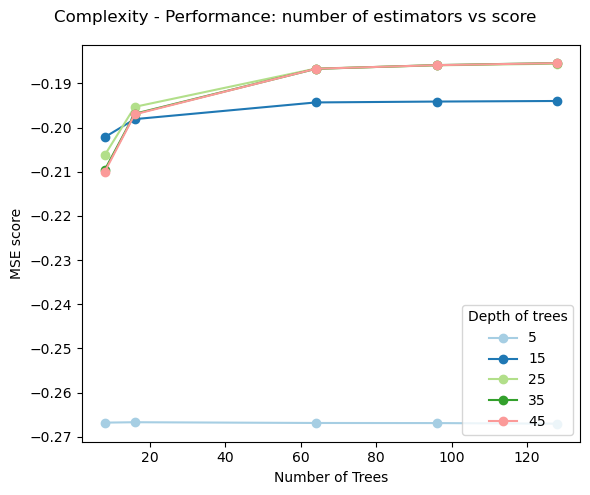

In [100]:
compare_forests( pd.DataFrame(forest.cv_results_) )

### comment? 

In [101]:
forest_pred = best_forest.predict(X_test)
scores = compute_scores(X_test, y_test, forest_pred)
save_scores('RandomForest', scores)

MSE: 0.1831
MAE: 0.3257
MR: -0.0032
adj-R2: 0.8195


In [102]:
export_pred(forest_pred, 'RandomForest')

# 6. XGBoost 

First we explore the default parameters, then move on to cross validation.

In [103]:
from xgboost import XGBRegressor
import time

In [104]:
xgbr = XGBRegressor(tree_method="hist")
start = time.time()
xgbr.fit(X, yf)
elapsed = time.time() - start
print(f'XGB Training ran in {elapsed:.5f} seconds')

XGB Training ran in 1.10724 seconds


In [106]:
xgbr_pred = xgbr.predict(X_test)
scores = compute_scores(X_test, y_test, xgbr_pred)
save_scores('XGBoost_def', scores)

MSE: 0.1780
MAE: 0.3235
MR: -0.0002
adj-R2: 0.8245


## Cross Validation

In [107]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [16, 64, 128],
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # def 0.3
    'max_depth': [3, 4, 6],                 # def 0.6
    'min_child_weight': [1, 2, 3],          # def 1
    'gamma': [0, 0.1, 0.2], # def 0, minimum loss reduction required for further tree splits
    'reg_alpha': [0, 0.5],      # def 0, L1 regularization to the feature weights
    'reg_lambda': [0.5, 1],     # def 1, L2 regularization to the feature weights
    'subsample': [0.8, 1.0],    # def 1
    'colsample_bytree': [0.8, 1.0]} # def 1

In [108]:
xgbr = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)


In [109]:
xgbr.fit(X, yf)

print(f"\nBest XGBRegressor with params: {xgbr.best_params_} and MSE: {xgbr.best_score_:.3f}")

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  16.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   9.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  11.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  11.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  11.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alph

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  13.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  11.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  11.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   8.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_a

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0,

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  11.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  11.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=  10.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0

In [110]:
# Creating a XGB model with the selected parameters
best_xgbr = XGBRegressor(max_depth=xgbr.best_params_['max_depth'],
                        n_estimators=xgbr.best_params_['n_estimators'],
                        learning_rate=xgbr.best_params_['learning_rate'],
                        min_child_weight=xgbr.best_params_['min_child_weight'], 
                        gamma=xgbr.best_params_['gamma'],
                        alpha=xgbr.best_params_['reg_alpha'],
                        reg_lambda=xgbr.best_params_['reg_lambda'],
                        subsample=xgbr.best_params_['subsample'],
                        colsample_bytree=xgbr.best_params_['colsample_bytree']
                        )
best_xgbr.fit(X, yf)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=128, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [111]:
xgb_pred = best_xgbr.predict(X_test)
scores = compute_scores(X_test, y_test, xgb_pred)

save_scores('XGBoost', scores)

MSE: 0.1747
MAE: 0.3207
MR: -0.0001
adj-R2: 0.8278


In [112]:
export_pred(xgb_pred, 'XGBoost')

# 7. Light GBM

In [64]:
from lightgbm import LGBMRegressor
import time

In [67]:
lgbm = LGBMRegressor()
start = time.time()
lgbm.fit(X, yf)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')

LGBM Training ran in 0.83772 seconds


In [68]:
lgbm_pred = lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)
save_scores('LightGBM_def', scores)

MSE: 0.1968
MAE: 0.3412
MR: 0.0067
adj-R2: 0.8060


## Cross Validation

In [69]:
# Define the parameter grid to search
param_grid = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': [3, 4, 6],                  
    'min_child_weight': [1, 2, 3], 
    'num_leaves': [8, 16, 32, 64],
    'n_estimators': [16, 64, 128],
    'reg_alpha': [0, 0.5],                   # L1 regularization
    'reg_lambda': [0.5, 1],                  # L2 regularization
}

In [72]:
lgbm = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
lgbm.fit(X, yf)

print(f"\nBest LGBMRegressor with params: {lgbm.best_params_} and MSE: {lgbm.best_score_:.3f}")

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[C

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsampl

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

Best LGBMRegressor with params: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 128, 'num_leaves': 64, 'reg_alpha': 0.5, 'reg_lambda': 1} and MSE: -0.176


In [ ]:
# Creating a XGB model with the selected parameters
best_lgbm = LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
                        )
best_lgbm.fit(X, yf)

In [ ]:
lgbm_pred = best_lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)

save_scores('LightGBM', scores)

In [ ]:
export_pred(lgbm_pred, 'LightGBM')

# 8. Hybrid Regression

In [123]:
# Import predictions from csv files, which have been rescaled to the original scale
forest_pred = pd.read_csv('predictions/RandomForest_pred.csv', header=None)
xgbr_pred = pd.read_csv('predictions/XGBoost_pred.csv', header=None)
lgbm_pred = pd.read_csv('predictions/LightGBM_pred.csv', header=None)

In [124]:
# Define the weights for each model
weights = [1/3, 1/3, 1/3]  # Equal weights for each model

# Combine predictions using weighted average
hybrid_predictions = (weights[0] * forest_pred + 
                      weights[1] * xgbr_pred +     
                      weights[2] * lgbm_pred)

# Standardize, scale to the same scale of y_test
hybrid_predictions = ss_y.transform(np.array(hybrid_predictions).reshape(-1, 1))

In [125]:
scores = compute_scores(X_test, y_test, hybrid_predictions)
save_scores('HybridModel', scores)

MSE: 0.1706
MAE: 0.3160
MR: 0.0012
adj-R2: 0.8319


In [126]:
export_pred(hybrid_predictions, 'HybridModel')

# 9. Stacking
Architecture from Quang

In [127]:
from vecstack import StackingTransformer

# Initialize 1st level estimators
estimators = [('RF', RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])),
              ('LGBM', LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
              ))]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=True, verbose=2, shuffle=True, metric=mean_squared_error)

In [128]:
stack = stack.fit(X, yf)

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [2]

estimator  0: [RF: RandomForestRegressor]
    fold  0:  [0.18622226]
    fold  1:  [0.18467009]
    fold  2:  [0.18818391]
    fold  3:  [0.18767977]
    ----
    MEAN:     [0.18668901] + [0.00137024]

estimator  1: [LGBM: LGBMRegressor]
    fold  0:  [0.17604921]
    fold  1:  [0.17687877]
    fold  2:  [0.17925742]
    fold  3:  [0.17606261]
    ----
    MEAN:     [0.17706200] + [0.00131129]



In [130]:
# Get stacked features
S_train = stack.transform(X)
S_test = stack.transform(X_test)

Train set was detected.
Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [131]:
xgbr = XGBRegressor()
start = time.time()
xgbr.fit(S_train, yf)
elapsed = time.time() - start
print(f'XGB Stacking Training ran in {elapsed:.5f} seconds')

XGB Stacking Training ran in 2.64828 seconds


In [132]:
stacking_pred = xgbr.predict(S_test)
scores = compute_scores(S_test, y_test, stacking_pred)

save_scores('Stacking', scores)

MSE: 0.1715
MAE: 0.3165
MR: 0.0007
adj-R2: 0.8312


In [133]:
export_pred(stacking_pred, 'Stacking')

# FINAL SUMMARY OF METHODS PERFORMANCES

We display below a summary of the scores obtained by the different models. 
We see that models can be classified differently based on the metric of evaluation chosen. 




In [134]:
final_scores=display_scores()

In [135]:
final_scores.to_csv('final_scores.csv')

In [136]:
final_scores

method       MSE       MAE        MR adj R-squared
0   LinearRegression  0.296741  0.425552  0.003132      0.707463
1             RANSAC  0.495552  0.539347  0.005133      0.511479
2      NeuralNetwork  0.207811  0.351935 -0.008863      0.795138
3     RegressionTree   0.22429  0.361031  0.000623      0.778893
4      NeuralNetwork  0.207842  0.351645  0.006825      0.795107
5     RegressionTree  0.224609  0.361214  0.000727      0.778578
6       RandomForest   0.18305  0.325748 -0.003179      0.819547
7        XGBoost_def  0.178022  0.323503  -0.00015      0.824504
8            XGBoost  0.174677  0.320709 -0.000072      0.827802
9       LightGBM_def  0.195743  0.340226  0.006355      0.807034
10          LightGBM  0.176602  0.322019  0.006874      0.825904
11       HybridModel  0.170553  0.315973  0.001207      0.831867
12          Stacking   0.17153  0.316452  0.000665      0.831158

# analisi finali
- predictions per anno vs reale (grafica)